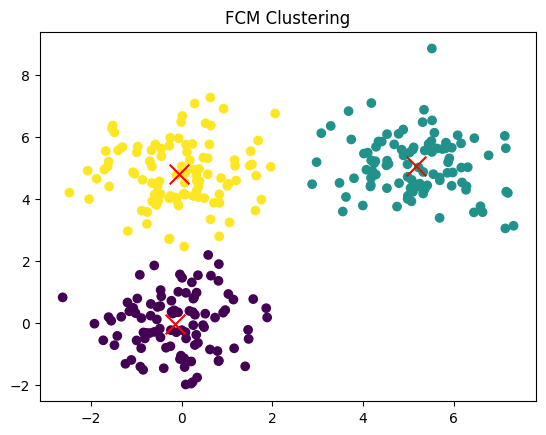

Point [0.06023021 2.46324211] → Memberships: [0.43002631 0.08264912 0.48732457]
Point [2.87610428 4.47424498] → Memberships: [0.10372784 0.54802383 0.34824833]
Point [-1.3044695   5.66967255] → Memberships: [0.05944564 0.04776975 0.89278461]
Point [-0.10703036  3.96475768] → Memberships: [0.04246596 0.02348336 0.93405068]
Point [0.25049285 0.34644821] → Memberships: [0.97901974 0.00634739 0.01463287]
Fuzzy Partition Coefficient: 0.8255413503415159


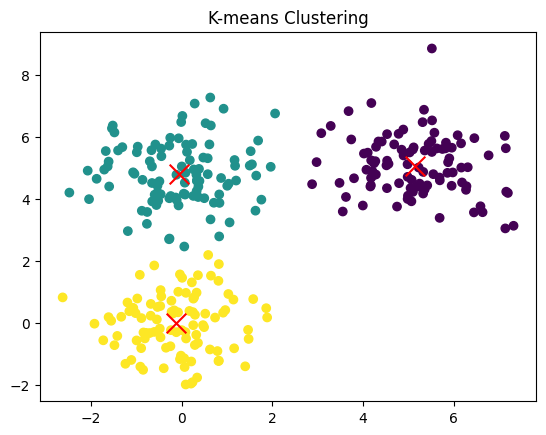

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
cluster1 = np.random.randn(100, 2) + [0, 0]
cluster2 = np.random.randn(100, 2) + [5, 5]
cluster3 = np.random.randn(100, 2) + [0, 5]
data = np.vstack((cluster1, cluster2, cluster3)).T
import skfuzzy as fuzz

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=3, m=2, error=0.005, maxiter=300, init=None)

cluster_membership = np.argmax(u, axis=0)
plt.scatter(data[0], data[1], c=cluster_membership, cmap='viridis')
plt.scatter(cntr[:,0], cntr[:,1], marker='x', s=200, c='red')
plt.title("FCM Clustering")
plt.show()
indices = np.random.choice(data.shape[1], 5, replace=False)
for i in indices:
    print(f"Point {data[:,i]} → Memberships: {u[:,i]}")
print("Fuzzy Partition Coefficient:", fpc)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42).fit(data.T)
labels = kmeans.labels_
plt.scatter(data[0], data[1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', s=200, c='red')
plt.title("K-means Clustering")
plt.show()

